In [24]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
dictionary = {'a': 0, 'x': 1, 'b':2}
reverse_dic = {0 : 'a', 1:'x', 2:'b'}

def decode_char(s):
    out = np.zeros([1, len(s), 3])
    for i in range(len(s)):
        out[0, i, dictionary[s[i]]] = 1
    return out

In [25]:
def produce_char(i):
    s = ''
    for j in range(i):
        s += 'a'
    s += 'x'
    for j in range(i):
        s += 'b'
    return s


In [26]:
train_data = []
for i in range(1, 11):
    train_data.append(decode_char(produce_char(i)))

In [27]:
f = open("Q2.in", 'r')
test_seq = f.readlines()
f.close()
print(test_seq)

['aaaaaaaaaaaaaaaxbbbbbbbbbbbbbbb\n', 'aaaaaaaaaaaaaaaaxbbbbbbbbbbbbbbbb\n', 'aaaaaaaaaaaaaaaaaxbbbbbbbbbbbbbbbbb\n', 'aaaaaaaaaaaaaaaaaxbbbbbbbbbbbbbbbbbb\n']


In [28]:

test_data = []
for t in test_seq:
    test_data.append(decode_char(t[:-1]))
    

In [29]:
print(test_data[1])

[[[ 1.  0.  0.]
  [ 1.  0.  0.]
  [ 1.  0.  0.]
  [ 1.  0.  0.]
  [ 1.  0.  0.]
  [ 1.  0.  0.]
  [ 1.  0.  0.]
  [ 1.  0.  0.]
  [ 1.  0.  0.]
  [ 1.  0.  0.]
  [ 1.  0.  0.]
  [ 1.  0.  0.]
  [ 1.  0.  0.]
  [ 1.  0.  0.]
  [ 1.  0.  0.]
  [ 1.  0.  0.]
  [ 0.  1.  0.]
  [ 0.  0.  1.]
  [ 0.  0.  1.]
  [ 0.  0.  1.]
  [ 0.  0.  1.]
  [ 0.  0.  1.]
  [ 0.  0.  1.]
  [ 0.  0.  1.]
  [ 0.  0.  1.]
  [ 0.  0.  1.]
  [ 0.  0.  1.]
  [ 0.  0.  1.]
  [ 0.  0.  1.]
  [ 0.  0.  1.]
  [ 0.  0.  1.]
  [ 0.  0.  1.]
  [ 0.  0.  1.]]]


In [12]:
tf.reset_default_graph()

n_hidden = 10
lstm = tf.contrib.rnn.BasicLSTMCell(n_hidden)
feature_size = 3
learning_rate = 0.001

input_data = tf.placeholder(dtype=tf.float32, shape=[1, None, feature_size])
target_data = tf.placeholder(dtype=tf.float32, shape=[None, feature_size])


initial_state = lstm.zero_state(1, dtype=tf.float32)

output, state = tf.nn.dynamic_rnn(lstm, input_data, dtype = tf.float32)
c_state , h_state = state


v_kernel , v_bias= lstm.variables[0], lstm.variables[1]
print(v_kernel.shape)

w = tf.Variable(tf.random_normal([n_hidden, feature_size]))
b = tf.Variable(tf.random_normal([feature_size]))
                
output_reshaped = tf.reshape(output, [-1, n_hidden])

logits = tf.matmul(output_reshaped, w) + b
preds = tf.nn.softmax(logits)

max_preds = tf.argmax(preds, 1)
##check how many of them are correct arg maxx is used because Y is one hat
correct_preds = tf.equal(tf.argmax(preds, 1), tf.argmax(target_data, 1))
accuracy = tf.reduce_sum(tf.cast(correct_preds, tf.float32))
                
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=target_data))
optimizer = tf.train.RMSPropOptimizer(learning_rate=learning_rate).minimize(loss)

init = tf.global_variables_initializer()




(13, 40)


In [60]:
print(h_state.shape)

(?, 10)


In [20]:
#just some config for not getting whole server
gpu_options = tf.GPUOptions(allow_growth=True)
config = tf.ConfigProto(gpu_options=gpu_options)

epochs_num = 200
sess =  tf.Session(config = config) 
sess.run(init)
for _ in range(epochs_num):
    total_loss = 0
    for i in range(10):
        s = len(train_data[i][0])
        input_ = train_data[i][:,0:s-1,:]
        target_ = train_data[i][:,1:s,:]
        target_ = np.reshape(target_, [-1, 3])
        l,_ = sess.run([loss, optimizer],feed_dict = {input_data : input_, target_data : target_})
        total_loss += l
    print(total_loss)
    
    


14.8649998903
14.2547088861
13.5654859543
12.8260384798
12.061679244
11.2953513861
10.5543706417
9.86705166101
9.25353425741
8.72327077389
8.27452480793
7.89693266153
7.57658809423
7.29960542917
7.05467808247
6.8337405324
6.63153618574
6.44474345446
6.27116930485
6.1091889739
5.95745289326
5.81478154659
5.68013465405
5.55259880424
5.43138068914
5.31580302119
5.20530119538
5.09941580892
4.99778401852
4.90013238788
4.8062684536
4.71607148647
4.62948337197
4.54649490118
4.46712639928
4.39140802622
4.31935948133
4.25097590685
4.18621864915
4.12501180172
4.06723791361
4.01275265217
3.96140316129
3.91303884983
3.86750917137
3.82465580106
3.78431729972
3.7463350147
3.71055485308
3.67682033777
3.64498353004
3.61491341889
3.58649401367
3.55961866677
3.53418952227
3.51011438668
3.4873072356
3.46568757296
3.44517922401
3.42571143806
3.40721853077
3.38964059949
3.37292160094
3.35701160133
3.34186315536
3.32743349671
3.31368273497
3.30057391524
3.28807252645
3.27614654601
3.26476556063
3.2539017647

In [42]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))


array([ 0.73105858,  0.88079708,  0.95257413])

In [31]:
f = open('Q2.out', 'w')
for i in range(len(test_data)):
    s = len(test_data[i][0,:,0])
    
    input_ = test_data[i][:,0:s -1,:]
    p= sess.run([max_preds],feed_dict = {input_data : input_})


    print("what should have been resulted", test_seq[i][1:s])
    
    print("what resulted", p[0])
    for item in p[0]:
        f.write(reverse_dic[item])
    f.write('\n')
f.close()
    

    
        
        


what should have been resulted aaaaaaaaaaaaaaxbbbbbbbbbbbbbbb
what resulted [0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
what should have been resulted aaaaaaaaaaaaaaaxbbbbbbbbbbbbbbbb
what resulted [0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
what should have been resulted aaaaaaaaaaaaaaaaxbbbbbbbbbbbbbbbbb
what resulted [0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
what should have been resulted aaaaaaaaaaaaaaaaxbbbbbbbbbbbbbbbbbb
what resulted [0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


In [23]:
test = test_data[0]
print(test)

[[[ 1.  0.  0.]
  [ 1.  0.  0.]
  [ 1.  0.  0.]
  [ 1.  0.  0.]
  [ 1.  0.  0.]
  [ 1.  0.  0.]
  [ 1.  0.  0.]
  [ 1.  0.  0.]
  [ 1.  0.  0.]
  [ 1.  0.  0.]
  [ 1.  0.  0.]
  [ 1.  0.  0.]
  [ 1.  0.  0.]
  [ 1.  0.  0.]
  [ 1.  0.  0.]
  [ 0.  1.  0.]
  [ 0.  0.  1.]
  [ 0.  0.  1.]
  [ 0.  0.  1.]
  [ 0.  0.  1.]
  [ 0.  0.  1.]
  [ 0.  0.  1.]
  [ 0.  0.  1.]
  [ 0.  0.  1.]
  [ 0.  0.  1.]
  [ 0.  0.  1.]
  [ 0.  0.  1.]
  [ 0.  0.  1.]
  [ 0.  0.  1.]
  [ 0.  0.  1.]
  [ 0.  0.  1.]]]


In [56]:
s = len(test[0,:,0])
gate_h = []
gate_c = []
for i in range(1, s):
    
    input_ = test[:,0:i,:]
    p, h_s, c_s= sess.run([max_preds, h_state, c_state],feed_dict = {input_data : input_})
    gate_h.append(h_s)
    gate_c.append(c_s)
    print(p)
    
kernel, bias= sess.run([v_kernel, v_bias])

weigth_i = kernel[:, :n_hidden]
weigth_f = kernel[:, n_hidden:2 * n_hidden]
weigth_o = kernel[:, n_hidden * 2:3 * n_hidden]
weigth_c = kernel[:, n_hidden * 3:]
b_i = bias[:n_hidden]
b_f = bias[n_hidden:2 * n_hidden]
b_o = bias[n_hidden * 2:3 * n_hidden]
b_c = bias[n_hidden * 3:]

gate_i = []
gate_f = []
gate_o = []


for i, h in enumerate(gate_h):

    t = test[0, i, :].reshape((1, 3))
    
    ins = np.concatenate((h, t),axis = 1)

    g_i = sigmoid(np.matmul(ins, weigth_i) + b_i)
    g_f = sigmoid(np.matmul(ins, weigth_f) + b_f)
    g_o = sigmoid(np.matmul(ins, weigth_o) + b_o)


    gate_i.append(g_i)
    gate_f.append(g_f)
    gate_o.append(g_o)


[0]
[0 0]
[0 0 0]
[0 0 0 0]
[0 0 0 0 0]
[0 0 0 0 0 0]
[0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 1]
[0 0 0 0 0 0 0 0 0 1 1]
[0 0 0 0 0 0 0 0 0 1 1 1]
[0 0 0 0 0 0 0 0 0 1 1 1 1]
[0 0 0 0 0 0 0 0 0 1 1 1 1 1]
[0 0 0 0 0 0 0 0 0 1 1 1 1 1 1]
[0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 2]
[0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 2 2]
[0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 2 2 2]
[0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 2 2 2 2]
[0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 2 2 2 2 2]
[0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 2 2 2 2 2 2]
[0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 2 2 2 2 2 2 2]
[0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 2 2 2 2 2 2 2 2]
[0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2]
[0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2]
[0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2]
[0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2]
[0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2]
[0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
[0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


In [60]:
gate_c = np.array(gate_c)
gate_h = np.array(gate_h)
gate_i = np.array(gate_i)
gate_f = np.array(gate_f)
gate_o = np.array(gate_o)
print(gate_c.shape)

(30, 1, 10)


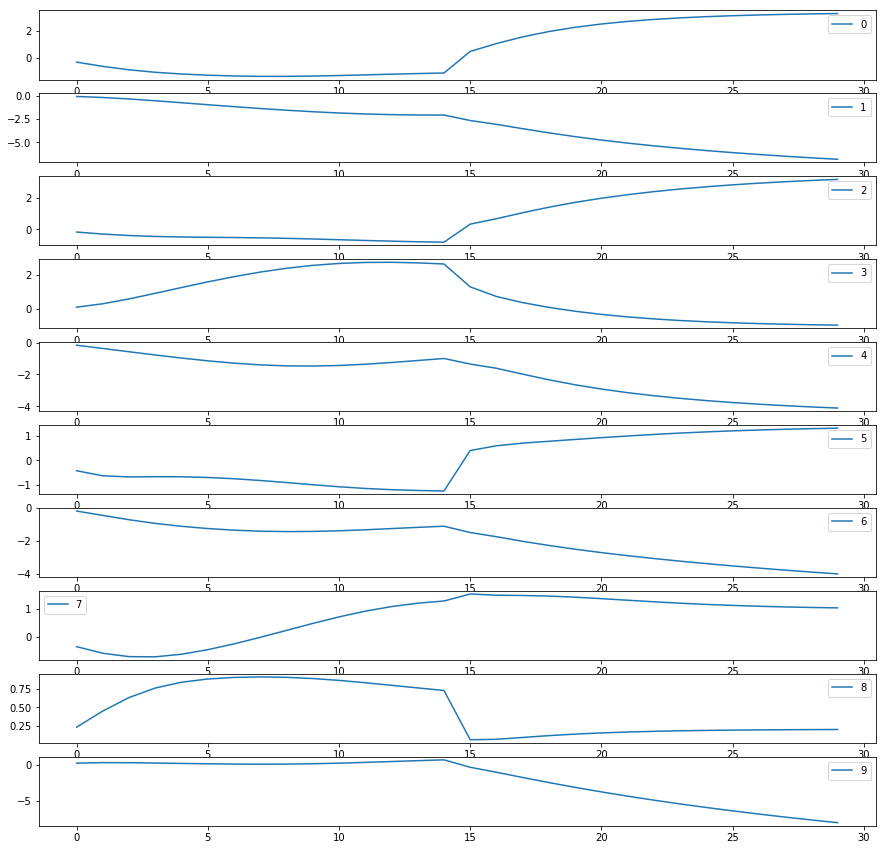

'\ncell state for all neurons\n'

In [66]:

fig, axs = plt.subplots(10, 1, figsize=(15,15))
for i in range(10):
    axs[i].plot(gate_c[:,0,i],)
    axs[i].legend(str(i))

plt.show()

'''
cell state for all neurons
'''

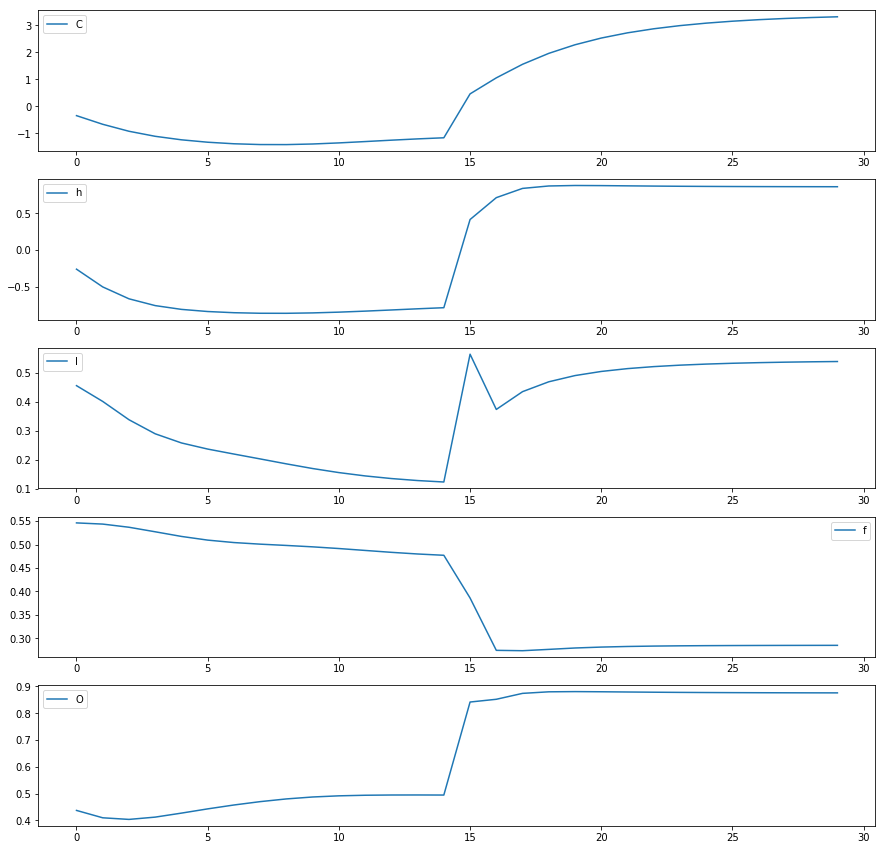

In [59]:
fig, axs = plt.subplots(5, 1, figsize=(15, 15))
axs[0].plot(gate_c[:,0,0], )
axs[0].legend("C")
axs[1].plot(gate_h[:,0,0], )
axs[1].legend("h")

axs[2].plot(gate_i[:,0,0], )
axs[2].legend("I")

axs[3].plot(gate_f[:,0,0], )
axs[3].legend("f")

axs[4].plot(gate_o[:,0,0], )
axs[4].legend("O")

plt.show()